In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
#seaborn은 데이터셋을 바로 불러올수있음

tips = sns.load_dataset("tips")  #내장되어있는 데이터

In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [4]:
tips.shape

(244, 7)

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [7]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


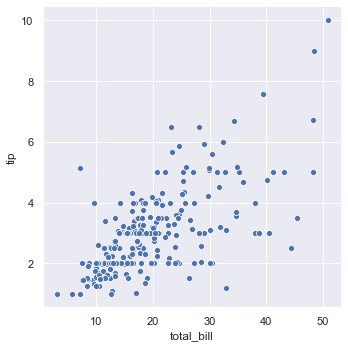

In [8]:
#replot 데이터의 형태로 x축, y축, 그에 대한 데이터 순서로 입력
#리플롯의 kind 디폴트 값은 점그래프
sns.relplot(x="total_bill", y="tip", data=tips);

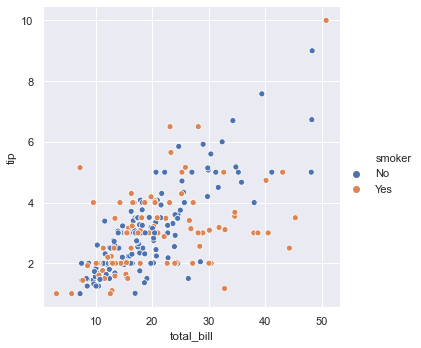

In [12]:
#hue로 카테고리 변수를 지정하여 색상을 다르게 할 수 있음
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

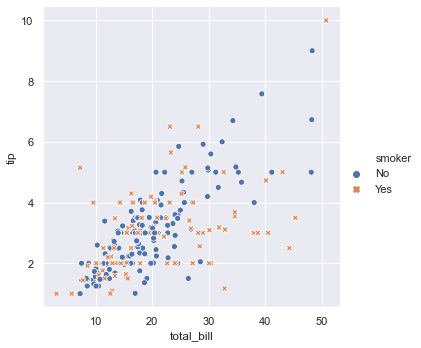

In [13]:
#style을 통해 카테고리 변수의 마커를 변경할 수 있음
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips);

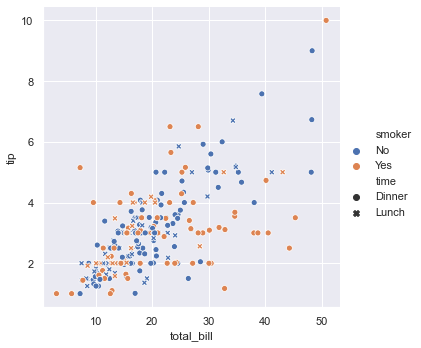

In [15]:
#hue와 style에 서로 다른 카테고리변수가 들어가면 다음과 같이 표시됨
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

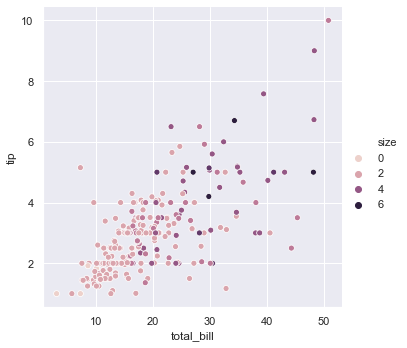

In [16]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

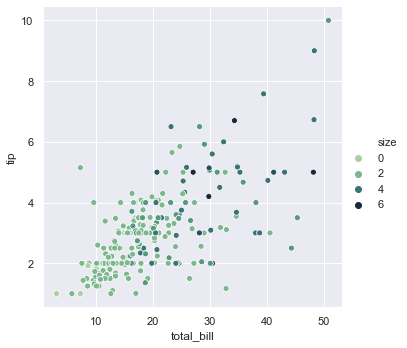

In [17]:
#palette는 컴퓨터가 자동으로 정하는 것이 아닌 내가 임의로 정하고 싶을 때 사용
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips);

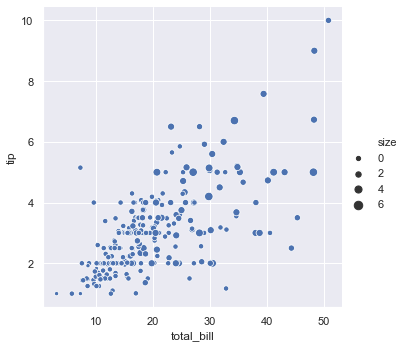

In [18]:
#size를 통해 카테고리 변수를 크기 비교를 할 수 있음
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

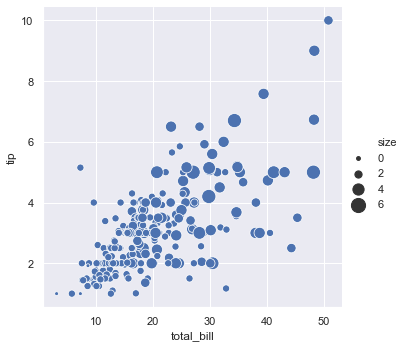

In [19]:
#크기를 내가 임의로 설정 가능
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);

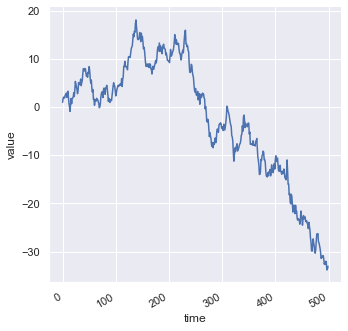

In [22]:
#리플롯 중 라인그래프
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

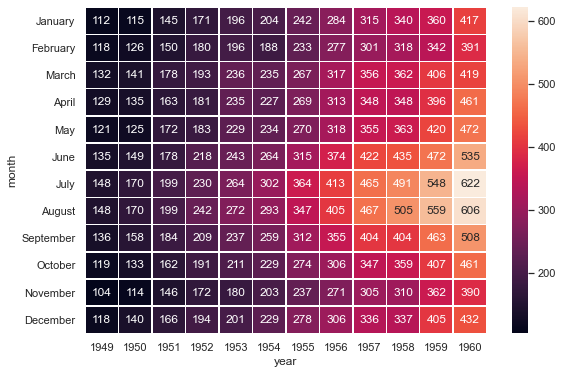

In [36]:
#히트맵 그래프
sns.set()

# Load the example flights dataset and convert to long-form
#flights라는 데이터를 이용해서 flights_long이라는 기본 데이터 셋을 만듦

flights_long = sns.load_dataset("flights")

#만든 데이터 셋을 피벗테이블 만들어서 새로운 형태의 flights 데이터 셋을 만듦
#month를 인덱스로 , year을 column, passengers를 승객수로
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt='d', linewidths=.5, ax=ax)